In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [8]:
data = pd.read_csv('/Users/sahilbhagat/Documents/ADS FALL 2023/IST 707/Assignment/Project/707-group-project-KaranShah1/data/Extracted Data FetalLife.csv', delimiter=",",encoding="ISO-8859-1")
data

,PatientId,Pregnancyweek,FirstPregnancy,GestationalDiabetes,Preclemsia,PretermBirth,StillBirth,Hypertension,DrugAbuse,Smoker,Alcohol,IsConceive,SystolicValue,DiastolicValue,PatientMedicines,MedicineDosage,Weight
0,438,0,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN
1,440,0,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN
2,864,0,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN
3,1012,0,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN
4,1105,0,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60821,54305,0,False,False,False,False,False,False,False,False,False,False,115.0,80.0,METFORMIN-HYDROCHLORIDE,500MG,85.0
60822,54683,0,False,False,False,False,False,False,False,False,False,False,115.0,80.0,METFORMIN-HYDROCHLORIDE,500MG,202.0
60823,54893,0,False,False,False,False,False,False,False,False,False,False,115.0,80.0,bisoprolol-fumarate,5MG,61.0
60824,55422,0,False,False,False,False,False,False,False,False,False,False,115.0,80.0,CAMOQUIN-HYDROCHLORIDE,EQ 200MG BASE,140.8


In [9]:
data.describe()


,PatientId,Pregnancyweek,SystolicValue,DiastolicValue,Weight
count,60826.000000,60826.000000,51951.000000,51951.000000,55243.000000
mean,30950.304738,10.863233,124.992493,80.399935,155.839634
std,17863.910797,16.312393,10.765922,3.560157,45.831011
min,2.000000,-2151.000000,100.000000,63.000000,25.000000
25%,15458.250000,0.000000,115.000000,80.000000,131.000000
50%,30851.500000,6.000000,129.000000,80.000000,161.700000
75%,46471.750000,19.000000,129.000000,81.000000,175.000000
max,61839.000000,40.000000,161.000000,88.000000,398.000000


In [14]:
data.columns

Index(['PatientId', 'Pregnancyweek', 'FirstPregnancy', 'GestationalDiabetes',
       'Preclemsia', 'PretermBirth', 'StillBirth', 'Hypertension', 'DrugAbuse',
       'Smoker', 'Alcohol', 'IsConceive', 'SystolicValue', 'DiastolicValue',
       'PatientMedicines', 'MedicineDosage', 'Weight'],
      dtype='object')

In [11]:
data.iloc[:, 2:12] = data.iloc[:, 2:12].astype(int)

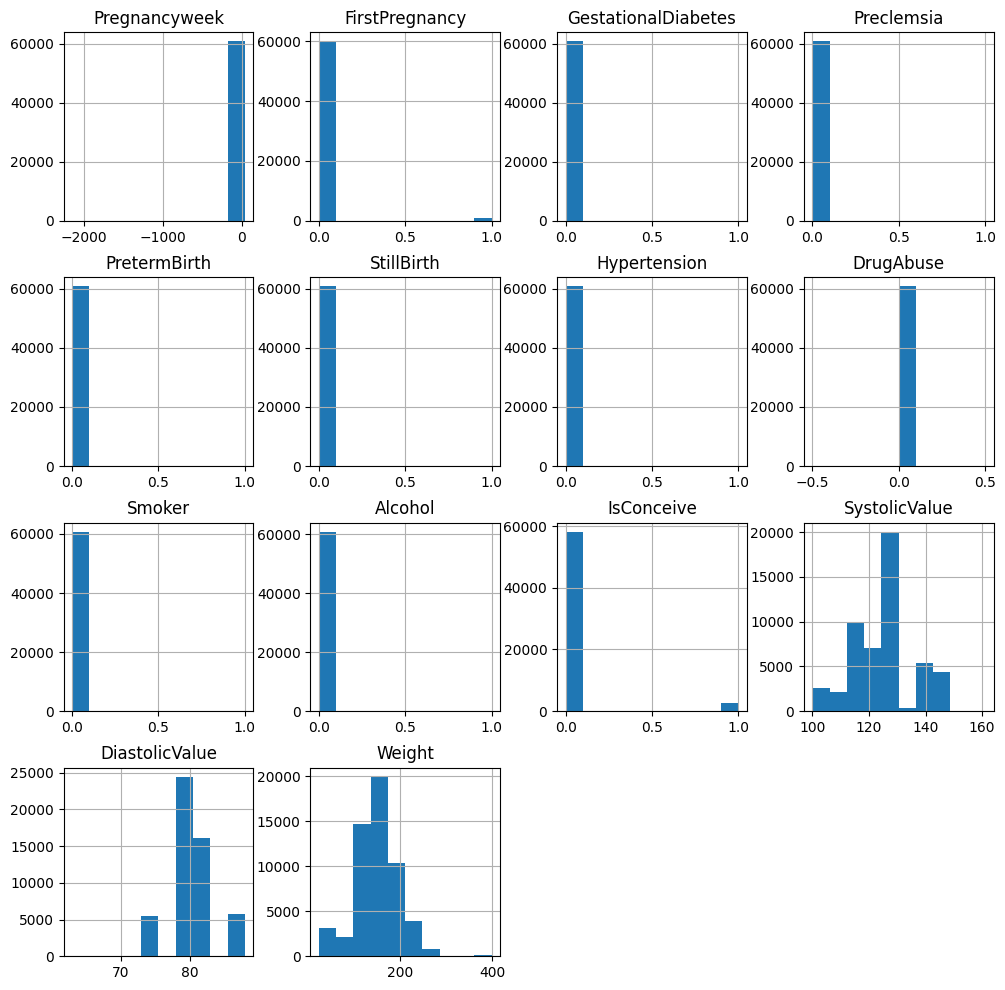

In [18]:
numeric_cols=['Pregnancyweek', 'FirstPregnancy', 'GestationalDiabetes',
       'Preclemsia', 'PretermBirth', 'StillBirth', 'Hypertension', 'DrugAbuse',
       'Smoker', 'Alcohol', 'IsConceive','SystolicValue', 'DiastolicValue','Weight']


data[numeric_cols].hist(figsize=(12,12))
plt.show()

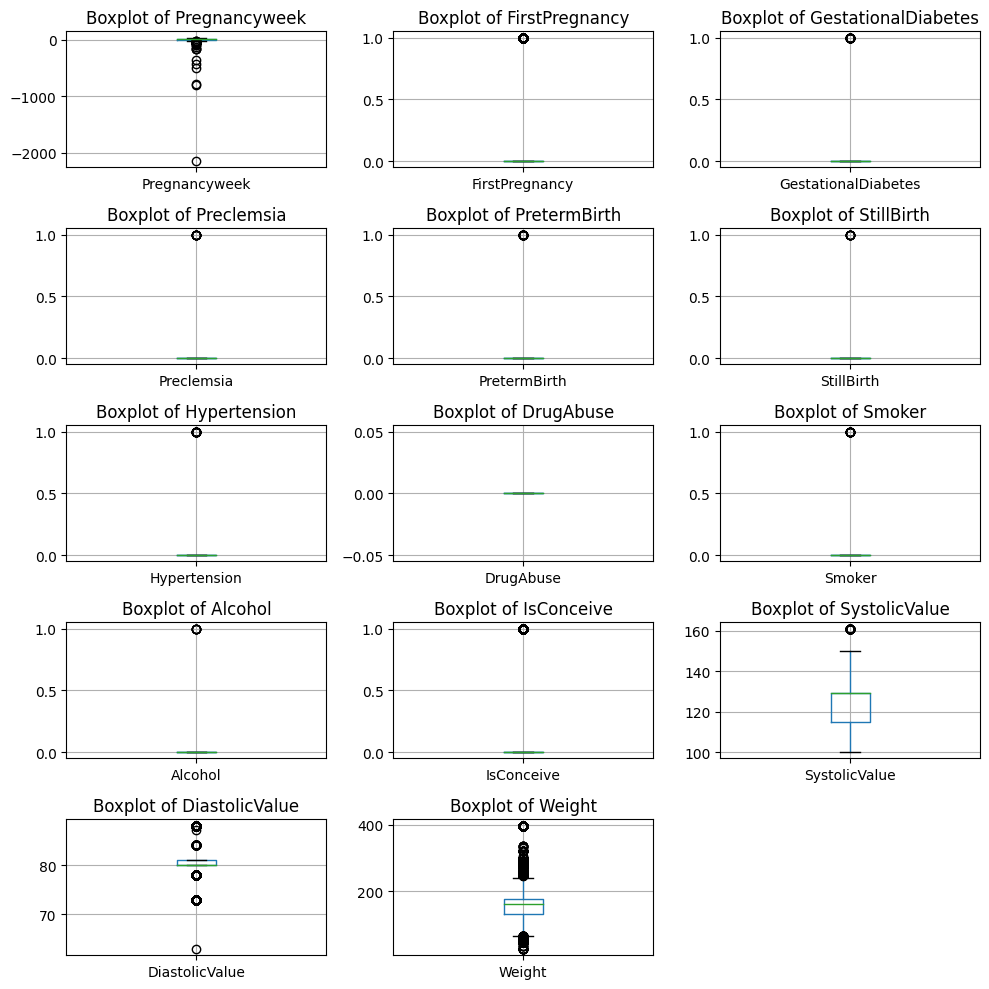

In [20]:
def plot_boxplots(df):
    # Get numerical columns
    numerical_columns = df.select_dtypes(include=['number']).columns

    # Calculate the number of subplots needed
    n = len(numerical_columns)
    n_cols = 3  # Number of columns in the subplot grid
    n_rows = n // n_cols + (n % n_cols > 0)  # Calculate the number of rows needed

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))
    axes = axes.flatten()  # Flatten the array to loop through it

    # Loop through each numerical column and plot a boxplot
    for i, column in enumerate(numerical_columns):
        df.boxplot(column=column, ax=axes[i])
        axes[i].set_title(f'Boxplot of {column}')

    # Remove any empty subplots
    for i in range(n, n_rows * n_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()


plot_boxplots(data[numeric_cols])
plt.show()

In [21]:
print(data.isna().sum())

PatientId                 0
Pregnancyweek             0
FirstPregnancy            0
GestationalDiabetes       0
Preclemsia                0
PretermBirth              0
StillBirth                0
Hypertension              0
DrugAbuse                 0
Smoker                    0
Alcohol                   0
IsConceive                0
SystolicValue          8875
DiastolicValue         8875
PatientMedicines       1283
MedicineDosage         1283
Weight                 5583
dtype: int64


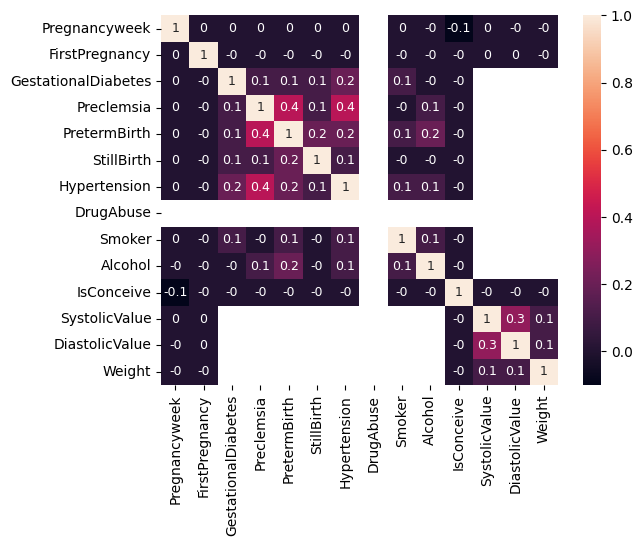

In [24]:
corr = data[numeric_cols].corr()
sns.heatmap(round(corr,1), annot=True,annot_kws={"fontsize":9})
plt.show()